<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytorch workflow

this is one of the workflow that you can follow:
- get data ready ( turn into tensors )
- build or pick a pretrained model( to suit your problem )

- fit the model to the data and make a prediction
- evaluate your model
- imporve thorught expremaentaion
- save and reload your train model

## what_were_convering

1. data ( prepare and load)
1. build model
1. fitting the model to data ( training )
1. making predictions and evaluating a model ( inference )
1. saving and load a model
1. putting it all together


In [28]:
import torch
from torch import nn ## nn contains all of pytorch building blocks of nerual networks
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:

torch.__version__

'2.5.0+cu121'

In [30]:
torch.cuda.is_available()

True

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## preparing and loading data

data can be almost anythign in amchine learning
* excel speadsheet
* videos
* images of any kind
* audio like songs or podcasts
* text

Machine leaning is a game of two parts:
1. get dat into a numberical representaion
2. buidl a model to learn pattersn in the numerical representaion

to showcase this , lets create some *known* data usign the linear regression formula

well use a linear regression formuat to make a straight line with *known* **parameters**


In [32]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
## splitting dat into train and test set one fo the most important concept in machine learning

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [33]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [34]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [35]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    plot trainig data and predictions
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="test data")
    if predictions is not None:
        # plot predictions in red
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
    plt.legend(prop={"size":14})
    plt.show()


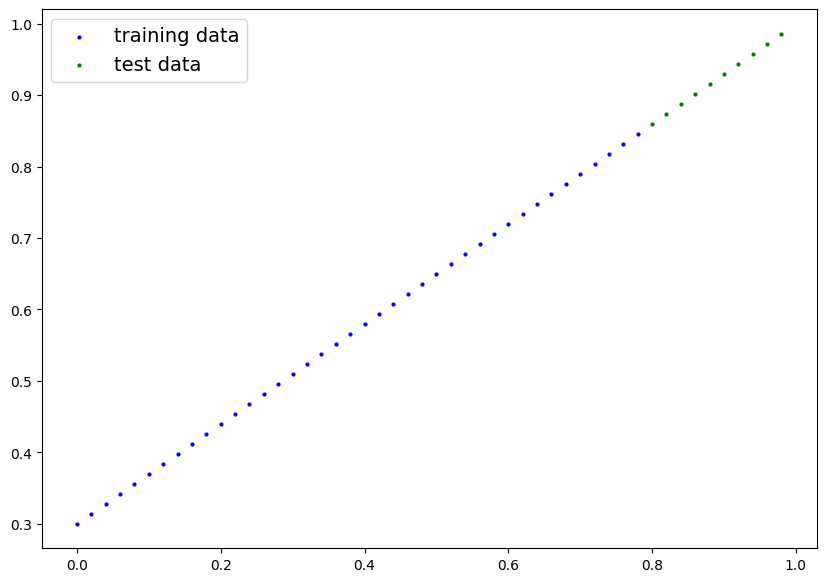

In [36]:
plot_predictions()

## builng model
our first pytorch model
this is very existing lets do it ...

* start with ranodm values ( weights and bias )
* look at training data and adjust the ranodm values to better represent ( or get closer to ) the ideal values ( the weight and bias values we used to create the data )
* how does it do so ?
through two main algorithms:
1. grdient descent
2. backpropagraion

In [37]:
# CReate a linear regresion model class
class LinearRegressionModelV1(nn.Module): # alomost everythign in pytorch inherit form nn.model
    def __init__(self):
        super().__init__()
        # use nn.Linear()
        # initialze model parameter to be used in various computetaions ( these could different layer fro torch , nn,single parameter , hard coded values or fuctions )

        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        # requires_grad=True means pytorch will track the gradients of this specific paramteter for use with torch .autograd and gradient descent ( for mahny torch.nn.modules , requres_grad=True si set by default )


        # forward method to define teh computraion in the model
        # any subclass of nn.module needs to overdie forward() this defines forward comutaion of the model
    def forward(self,x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weights * x + self.bias # this is teh linear regression formula


#### pytorch model buiding essentilas
* torch.nn - contains all of the buildig for compuraiton graphs
*  torch.nn.parameter - what parameter should our model try and learn , often a pytorch layer form

* torch.nn.module the base class for all nerual netwrok moduel
* torch.optim - this is where the optirmzers in pytorhc liive , they will help in gradient decend  
* def forward() - all nn.module subcalasses rqurre you to overwrite forward() ,
* torhc.utils.data.Dataset presents a map between key ( label ) and sample ( features ) pairs of yoru data such as images and their assocaiated lables
* torch.utils.data.DataLoader creates a python iterable over a torch Dataset ( allows you to iterate over your data )



### checking the contents of our pytorch model
now weve created a model , lets see whats inside...
sowe can checkout our model parameter or what inside our model usign `.paramerters()`


In [38]:
## create a ranodm seed
torch.manual_seed(42)


## create an instance an instance of model ( this is a subscall of nn.Module)
model_0 = LinearRegressionModelV1()
#model_0 = model_0.to(device)
# checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [39]:
# list name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [40]:
weight,bias

(0.7, 0.3)



### making predicitn using `torch.inference_mode()`
to check our model`s prediction power  let seehow ell it predicts `y_test` based on `X-test`
when we pass data thourth our model , it going to runit thorugh the forward method



In [41]:
# make predicions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
    y_preds

y_preds



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

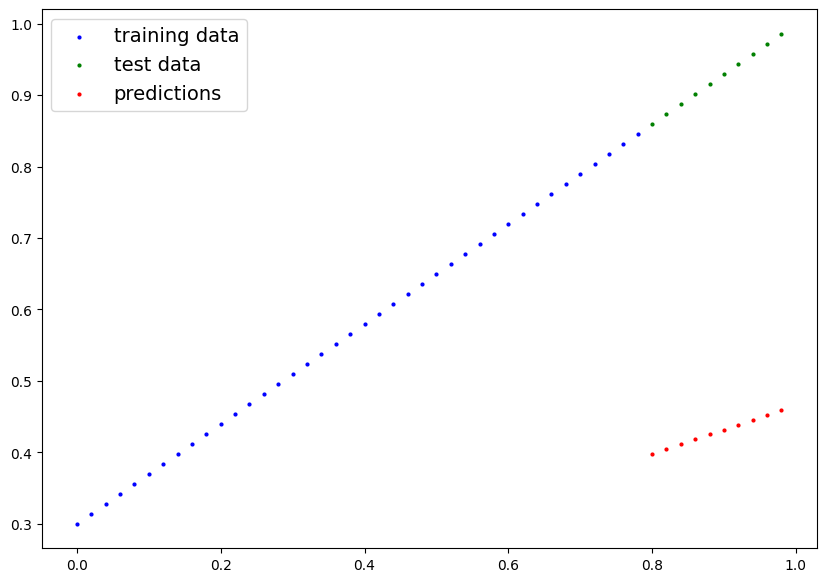

In [42]:
plot_predictions(predictions=y_preds)

In [43]:
# y_preds = model_0(X_test) # this is another way to do the same


In [44]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [45]:
''' with torch.no_grad():
    y_preds = model_0(X_test)  ''' #-> this is another way but not recommended

' with torch.no_grad():\n    y_preds = model_0(X_test)  '

### train model
teh whoel ideal of traingin is for a model to move from unknown parameer to someknown parameter
or in other workds froma poor representaion of the dat to a better represetnaion of the data
one way to measrue how poor or how wrong your model predtionc are is to use a loss fuction
* note : loss fuciton may also be called const fucion or createron in different aras . for our case were going to refer to it as a loss fuction

* *loss fuciton * a fuction to measure how wrong yoru model predtion are to the ideal output so lower is better

* *optimizer* takes into account hte loss of a model and adjust the model parameter to imporvie the loss fuction and specifically for pytorch , we need:
* a training loop
* testing loop


In [46]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [47]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

l1loss -> creates a creterison that measure mesn absolute error between each element in the input x and the target y .


In [48]:
# setup a loss fuction
loss_fn = nn.L1Loss()

# set up an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate the most imporatant hyperparameter you can check



## building a trainint loop in pytorch and a testing loop
a couple of things we need in  a training loop
0. loop throuth the data
1. forward pass ( this involves dat moving thourhg our data `forward()` functions ) - also called forwrard propagation
2. calculate the loss ( compare forward pass predictiosn to groudp truth lables )
3. optimizer zero grad
4. loss backward - move backward thourght the network to cacluate the gradient of each of the parameter of your modle with respect to the loss
(**backpropagation**)
5. optiizer step - use the optmizer to adjust the parameter to reduce the loss (**gradient descent**)


#### propagation:
* the term propagation refers to the process of passing information forward and backward throught a neural network during trainng .
* fowrad proparation is when inputs pass through the network to produce predictions
* backward propagatioon ( offen callad backpropagation ) cacluates gradients of the loss function with respenct to the weight s by moving from the output layer back to the input layer . this si key to understanding how much each weight contirubuted to the error , enablign their adjustment to minimize the error

#### optimization (optimizer )
- an optimizer is the algorithm that uses these gradients to adjust the models parameter like weights to minimize the loss function , common optimizers include stochastic gradient descent (SGD) adam and rmsprop .

- optimizers apply these gradients in a way that gradually imporves teh model , which is known as gradient descent .
the optimzier itself is not called propagation , rather it sues the gradients obtained thorugh backpropagation to perform updates that minimize the loss .


## epochs  and hyperparameter
```py
epochs = 1
```
- epochs: an epoch is one complete pass throght the entire trainign dataset . this is a hyperparameter , meaning its values we decide and set before training starts ratehr thatn one that the model learns .

- settings epochs = 1 means our model will train over the data jsut once in this example

## the traingin loop
for epoch in range(epochs):

- we start a loop that will iterate throuth the specified number of epochse , ehre epochs is set to 1 , so this loop will only run once .

- in practice we often set epochs to a much larger number to train a model more extensively

## traingg mode

model_0.train() # sets the model to traingin mode

- model_0.train(): thsi fucntion set the model in training mode in pytorch , this command affects certian layers like `Dropout` and `BatchNorm` , which behae differently during training and evaluation .

  - Dropout layer: Dropout randomly turns off a fraction of neurons during traing to prevent overfittig . in evaluatio mode , it uses the ful network .
  - Batch Normalizaion layers: these normize the inputs in mini-batches . i training mode . tehy compute statistics dynamically based on each batch , while in evaluation , they use the entire datasets stastics .

## forward pass

y_pred = model_0(x_train)

- forward pass : this step invloves passing inputs data , X_trian , throuth the model to get predictions y_pred .

- here , model_0(X_train) is shorhad for feedint X_train throughteach layer in model_0 to compute the models output

## cacluating the loss
loss = loss_fn(y_pred,y_train)

- loss caculation: the loss_fn funcion mesures how well the models predictsion , y_pred, match the actual layesr , y_train .

- loss funtion differbased on the task . for example for regression tasks , we often use Mean Squread Error , while in calssification , we might use Cross ENtropy loss .

- the result , loss represetns the error or disrepancy between predciotns and actual values .
## zeroing out gradients

optimzer.zero_grad()

- zero Gradeints : in pytorch , gradeitns accumulate by default. so , to prevent accumulation from previous steps we call optimzer.zero_grad() at the beginning of eachoptimization step.
- this clearys any gradistens calcuated int eh last pass , ensuraing each backward pass gives only the gradients for the current step .

##  backward pass ( cacluating gradiens )

loss.backward()
- backward pass : this step computes the gradients of the loss with respect to teach model parameter ( like weights and biease )
- loss.backward() performs backpropagation , which works by applying the chain rule to propagat eh erro backward thorght the network
- each parameter in teh model ( eg weights ) now has a gradient which tell use the derection and magnitue  to adjust the parameter to minimize the loss.

## optimization step( updating parametes )

optimzer.step()
- optimzer step: the optimzier uses the gradients cacluated in teh backward pass to adjsut the models parameters .
- this is where gradient descent comes in , as the optimzer ( eg SGD, Adam )
- by default , pytorch accumulates these gradients , whcih is why we zero them ut at the beginning of eachloop

## explanation of model_0.eval()

model_0.eval()  # set the model to evalution mdoe

- evaluation mode : after trainign when evaluating the mdoel on validation or test data , we set model_0.eval() . this switches the mode to evaltion mode, which freezes layesr like Dropout and batch normilization to use fixed values .

- eval() ensures consisntent and reliable results when tesing , as it diesables behaviours specific to traing like randomly dropping neurons with dropout .

each of these steps plays a critical role in training and optimizing the mdoel effectively



In [49]:
# an epch is one loop throuth the data ...( this is a hyperparemeter because weve set it ourself)
## Training
epochs = 100000
## loop throuth the data
for epoch in range(epochs):
  # set the model to triaign mode
    model_0.train() # train set allparamter require gradient
    # Forward pass
    y_pred = model_0(X_train)
    # calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print("loss",loss)
    # optimzer zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer step
    optimizer.step() # bt defaht how th optimzer changes iwll accumualte thourgh the loop so we have to zer them above ...
    ## testing
model_0.eval() # turns off gradient tracking

with torch.inference_mode(): # turns off gradietn tracking & couple more thisng behidn the since
# you may also see torh.no_grad() in order code
    #> do forward pass
    test_pred = model_0(X_test)
    #> cacluate the loss
    test_loss = loss_fn(test_pred, y_test)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

# print out model state_dict()



Epoch: 99999 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112


In [50]:
model_0.state_dict() # check the weights and the bias

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [51]:
# lets now make some prediction

with torch.inference_mode():
    y_preds = model_0(X_test)
    y_preds

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

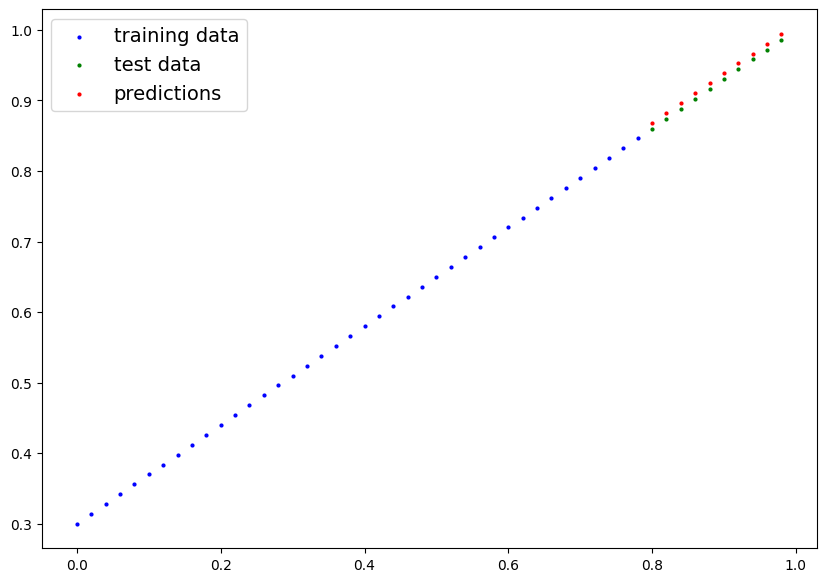

In [52]:
# prot preditions

plot_predictions(predictions=y_preds) # now that is wonderful it has learned

when you trian a neural network model again after it has alrady learned , it generally continues learning from where it left off rather tahn starting from scratch , provided you dont reset or reinitilaze the model parameters .

## scenarios for re-traing

- if you train a model for additional epochs withour resetting the weights , it wil start with the parametesr it already leaned . t is allows it to refine or imporve its predticons basedon the knowledge it ahs so far .

- this si common in deep leanring workflows . for example , if you trained a model for 10 epochs and found that it could benefits from more epocs . the model will remember its current weights and build upon them .


## fine tuning a pretrained model

- in transfer leanring , we often use a pretrained model ( eg a neaural network trained on a large dataset like imageNet) and fine tune it for a specific task .the model retains its leaned knwledge ( such as recognizing geneeral sheps or pattersn ) andonly learns additional details or adapts to the new task .


## resettign the model:

- if you reinitialize th model weights , the model will start leanring from scratch with no priour knowledge . this is typically daone only if you want to restart traiign form the beginning . possiblly with new settisn or data.

## how to control retraingin behaviour

- saving and loading models : in frameworks like pytorch and tensorflow , you can save the models state after training and load it back in later , allowing teh model to contineu leanring from where it leaft off.

- leaning rate adjustement: some times you may want to reduce the leanring rate if contiuign traingin to allow for fine adjustments as the model is already clse to as olution


in summary , wheter a model starts form zero knowledge or builds on its curent knowldege depends on whether you reset its parametes .if not , it will continue to leanr from wehre ti left off.